# Ames Housing Data - Modeling


### Contents:
- [Machine Learning: Linear Regression](#Machine-Learning-Model%3A-Linear-Regression)
- [Machine Learning: Lasso](#Machine-Learning-Model%3A-Lasso)
- [Machine Learning: Ridge](#Machine-Learning-Model%3A-Ridge)
- [Graph/Visual Interpretation](#Graph%2FVisual-Interpretation)
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, VarianceThreshold, f_regression
import sklearn.linear_model as linear_model
import pickle
import csv
import math

%matplotlib inline

## Import Scaler, training and test data

In [2]:
X_train_sc = pd.read_csv('../datasets/X_train_sc.csv', header=None)
X_test_sc = pd.read_csv('../datasets/X_test_sc.csv', header=None)
y_train = pd.read_csv('../datasets/y_train.csv', header=None)
y_test = pd.read_csv('../datasets/y_test.csv', header=None)

In [5]:
X_train_sc.

,0
0,177625
1,158500
2,184000
3,175500
4,235000


In [59]:
with open('../assets/columns.pkl', 'rb') as f:
    columns = pickle.load(f)

In [60]:
y_test_mean = np.mean(y_test)
y_test_mean[0]

177900.5730994152

In [61]:
y_test['mean'] = y_test_mean[0]

In [62]:
math.sqrt(mean_squared_error(y_test[0], y_test['mean']))

73586.60526810591

**What is this?**
- The mean is our Baseline model **177900**, this is our baseline, meaning our predicted score should be better than this. (The closer to the true mean the better result we will get)
- The RMSE for our baseline model is **73586**. Our goal is not only get as close as the true value, but also, do better than our baseline RMSE. (The lower RMSE the better result we will get)

## Machine Learning Model: Linear Regression
---

In [63]:
lr = LinearRegression()

In [64]:
lr.fit(X_train_sc , y_train)
lr.score(X_train_sc, y_train)

0.8418234467753433

In [65]:
lr.score(X_test_sc, y_test[0])

0.8861651902663481

In [66]:
pred = lr.predict(X_test_sc)

In [67]:
math.sqrt(mean_squared_error(y_test[0], pred))

24827.68983913611

In [68]:
lr.coef_

array([[ 1.69909122e+04,  1.73733653e+04,  8.29477936e+03,
         3.16068105e+03,  1.93946744e+03,  6.21167612e+03,
         3.43175611e+03,  7.37674105e+03,  3.53671565e+03,
         1.32054102e+03,  4.32585349e+03,  1.74280780e+03,
         4.59117915e+03,  5.67379252e+03, -1.43153686e+03,
         4.73915906e+03,  3.22614086e+03,  3.31608604e+01,
         2.64795999e+03,  5.63627191e+03, -1.28877941e+03,
         1.84271042e+03, -5.17716570e+00,  2.10857064e+03,
        -3.00721921e+02,  1.25928244e+03,  6.03492943e+03,
         9.17998485e+01,  1.84253028e+03,  3.06547231e+03,
         1.50149364e+03,  2.70462189e+03, -2.01769826e+03,
        -6.34822895e+02,  3.70376458e+03, -2.11451889e+03,
        -2.30502106e+03]])

**What happened?**
- We see two scores shown above. The R-squared score from our training data is **84.182** and the score from our test data is **88.616**. What does this mean? This means that our model is underfitting, we should include more features into our X variables. However, after several tries, these are the best outcome.
- R-squared represents the variance explained by our model relative to the baseline. Which is a statistical measure of how close the data are to the fitted regression line. Our goal is to aim the R-squared as high as possible. 
- Linear Regression model applied our selected variables into the model without eliminating any of the variables 

**Why/why not this model?**
- Reason why I didn't select this model as my final, because the RMSE is slightly higher than my Lasso method. The RMSE represents the distance of our predcited price to the actual price. The lower the RMSE is means the better result will produce.


## Machine Learning Model: Lasso
---

In [73]:
lasso = LassoCV(cv=3)

In [74]:
lasso.fit(X_train_sc, y_train.values.ravel())
lasso.score(X_train_sc, y_train)

0.8407010050715087

In [75]:
lasso.score(X_test_sc, y_test[0])

0.8882681666620227

In [76]:
lasso_pred = lasso.predict(X_test_sc)

In [77]:
math.sqrt(mean_squared_error(y_test[0], lasso_pred))

24597.288261164285

In [78]:
lasso.coef_

array([17373.63236987, 18143.67837228,  8020.55368023,  3703.55034914,
        1573.36475644,  6209.94722115,  4374.73502406,  7369.98519268,
        3479.80187722,   661.60769475,  1946.16603597,  1083.90229622,
        3113.774293  ,  4003.21238361, -1640.22918231,  4362.89899133,
        2627.93186844,    -0.        ,  2619.04677335,  5202.15031174,
        -833.87868414,  1956.15784767,     0.        ,     0.        ,
          -0.        ,   866.30704128,  5772.48714815,  -122.73850242,
          -0.        ,  2564.56549816,  1233.09985823,     0.        ,
       -1445.91669182,    -0.        ,  3462.18424536, -1309.60208578,
       -2068.9483852 ])

In [88]:
lasso_dropped = pd.DataFrame(lasso.coef_, index=columns)

In [91]:
lasso_dropped[lasso_dropped[0]==0]

,0
bsmt_qual_TA,-0.0
garage_finish_Fin,0.0
mas_vnr_type_None,0.0
kitchen_qual_TA_Gd,-0.0
exter_qual_TA_Gd,-0.0
foundation_CBlock,0.0
open_porch_sf,-0.0


**What happened?**
-  We see two scores shown above. The R-squared score from our training data is **84.070** and the score from our test data is **88.826**. What does this mean? This means that our model is underfitting, we should include more features into our X variables. However, after several tries, these are the best outcome.
- R-squared represents the variance explained by our model relative to the baseline. Which is a statistical measure of how close the data are to the fitted regression line. Our goal is to aim the R-squared as high as possible. 
- Lasso model is a aggressive model that drops out any of our variables that are not the best fit to our model. As the coefficient shown above, the number 0 represent the variables that are dropped by Lasso.
- Lasso dropped 7 features from my manual selected features (Shown above), because it doesn't weight as much.

**Why/why not this model?**
- Reason why I didn't select this model as my final, because the RMSE is the highest among linearRegression and Ridge. The RMSE means the distance of our predcited price to the actual price. The lower the RMSE is means the better result will produce.





## Machine Learning Model: Ridge 
---

In [172]:
ridge = RidgeCV()

In [173]:
ridge.fit(X_train_sc, y_train)
ridge.score(X_train_sc, y_train)

0.8418110708479818

In [175]:
ridge.score(X_test_sc, y_test[0])

0.8859039649982906

In [176]:
ridge_pred = ridge.predict(X_test_sc)

In [177]:
math.sqrt(mean_squared_error(y_test[0], ridge_pred))

24856.16049522175

In [178]:
ridge.coef_

array([[16838.17051635, 16906.20830168,  8293.62438961,  3206.29822869,
         2031.83842714,  6207.05281554,  3428.01588758,  7282.18613886,
         3569.28293343,  1413.41121583,  4200.90301148,  2005.60887145,
         4603.03440719,  5543.08107109, -1545.55973016,  4685.14086827,
         3218.36022602,   -23.9025507 ,  2684.81724681,  5582.01625087,
        -1258.05835537,  1880.2033203 ,    36.10751735,  2051.65956292,
         -392.9543683 ,  1275.34205168,  6011.83839823,    66.66217479,
         1699.53895504,  3048.43658614,  1490.29121563,  2563.08896299,
        -2000.28933546,  -564.99072864,  3719.02837881, -2099.16695866,
        -2312.41329375]])

**What happened?**
-  We see two scores shown above. The R-squared score from our training data is **84.181** and the score from our test data is **88.590**. What does this mean? This means that our model is underfitting, we should include more features into our X variables. However, after several tries, these are the best outcome.
- R-squared represents the variance explained by our model relative to the baseline. Which is a statistical measure of how close the data are to the fitted regression line. Our goal is to aim the R-squared as high as possible. 
- Ridge model by comparing to Lasso is less aggressive. Instead of dropping all the variables that returns 0 in the coefficient, Ridge approach the weaker variables towards 0. Ridge still keeps all the variables that we selected. 

**Why/why not this model?**
- Reason why I select this model as my final, because the RMSE is the lowest among linearRegression and Lasso. The RMSE means the distance of our predcited price to the actual price. The lower the RMSE is means the better result will produce.




## Graph/Visual Interpretation

In [179]:
with open('../assets/columns.pkl', 'rb') as f:
    columns = pickle.load(f)

In [180]:
# creating 
betas = pd.DataFrame(ridge.coef_, columns=columns).T

In [181]:
betas.columns = ['weights']
betas['abs_w']= betas['weights'].abs()

In [182]:
beta_0 = ridge.intercept_

In [183]:
weights = betas.sort_values('abs_w', ascending=False)['weights'].head(20)

In [184]:
labels = weights.index

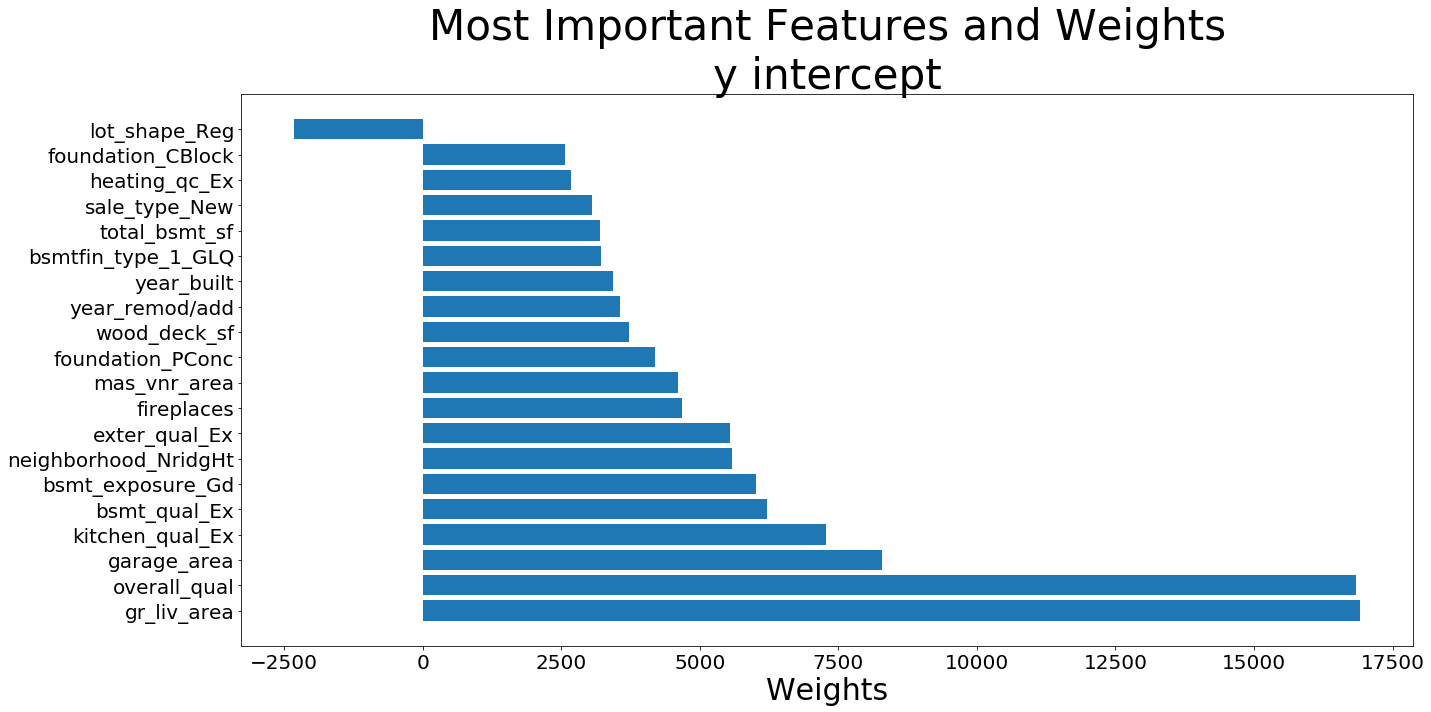

In [185]:
plt.figure(figsize=(20,10))
plt.barh(labels, weights)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.xlabel('Weights', fontsize=30)
plt.title(f'Most Important Features and Weights\ny intercept', fontsize=42)
plt.tight_layout()

Note how **huge** those numbers are. What does it represent? The represents that how much the features weights on our targets. Meaning, the if the features has a big impact to our target the higher the weights are. 

Just by looking at the top few features that impact our sale price. Ground Living area, Overall quality and Garage area. So when we looking at a house we should look these features first. Because as I mentioned these are the features that weighted the most in regards to the sale price.

Instead of looking at the features that positively impact to our sale price, we should also be looking at what feature will decrease our price. Note that there is a negative weights on the lot_shape_Reg. Meaning that if the house have this feature it will negativily impact the house price. 


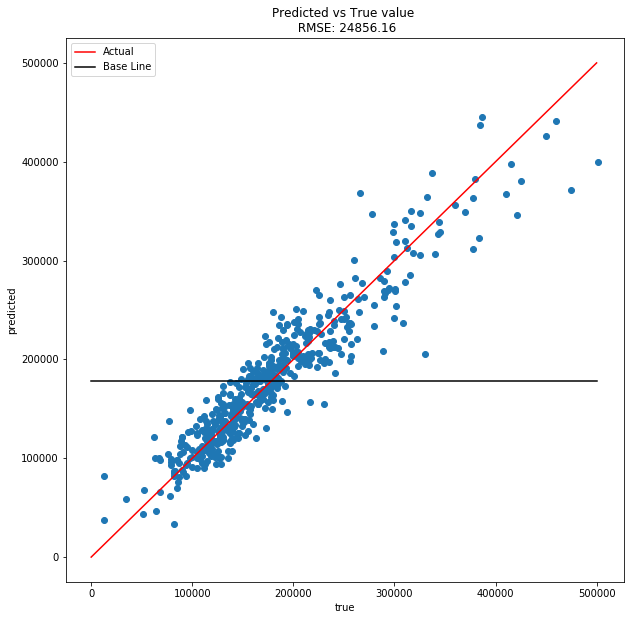

In [188]:
plt.figure(figsize=(10,10))
plt.title(f'Predicted vs True value \n RMSE: {mean_squared_error(y_test[0], ridge.predict(X_test_sc)) ** 0.5:.2f}')
plt.scatter(y_test[0], ridge.predict(X_test_sc))
plt.ylabel('predicted')
plt.xlabel('true')
plt.plot([0, 500000], [0, 500000], color='r', label='Actual')
plt.plot([0,500000], [177900.573099,177900.573099], color='k', label='Base Line')
plt.legend()

**What's going on?**
- Our goal here is simple, we want to make all the blue dots to be as close to the Actual Line as possible. 
- The blue dots here represent our predictions from our feature selection. In this case, these are the result from the model Ridge. 
- The base line here represented in black line is the mean of our target (around 177900.57), Our blue dots are only closed to the range from around 150k to 200k. This is insufficient rest of our prediction will be off.
- The Actual Line here presented in red is the acutal predictions, which is our goal. 

**Conlcusion**
- As we can see from this graph, a lot of our predcition is really close to the acutal line from range around 100k to 250k. Which is a good sign, however, as the price increase our prediction tend to fall apart to the red line. 

In [65]:
def md_coef_table(labels, weights):
    print('| feature | weight |\n| --- | --- |')
    for i in range(len(labels)):
        print(f'| {labels[i]} | {weights[i]:.2e} |')

In [66]:
md_coef_table(labels, weights)

| feature | weight |
| --- | --- |
| gr_liv_area | 1.69e+04 |
| overall_qual | 1.68e+04 |
| garage_area | 8.29e+03 |
| kitchen_qual_Ex | 7.28e+03 |
| bsmt_qual_Ex | 6.21e+03 |
| bsmt_exposure_Gd | 6.01e+03 |
| neighborhood_NridgHt | 5.58e+03 |
| exter_qual_Ex | 5.54e+03 |
| fireplaces | 4.69e+03 |
| mas_vnr_area | 4.60e+03 |
| foundation_PConc | 4.20e+03 |
| wood_deck_sf | 3.72e+03 |
| year_remod/add | 3.57e+03 |
| year_built | 3.43e+03 |
| bsmtfin_type_1_GLQ | 3.22e+03 |
| total_bsmt_sf | 3.21e+03 |
| sale_type_New | 3.05e+03 |
| heating_qc_Ex | 2.68e+03 |
| foundation_CBlock | 2.56e+03 |
| lot_shape_Reg | -2.31e+03 |


| feature | weight |
| --- | --- |
| gr_liv_area | 1.69e+04 |
| overall_qual | 1.68e+04 |
| garage_area | 8.29e+03 |
| kitchen_qual_Ex | 7.28e+03 |
| bsmt_qual_Ex | 6.21e+03 |
| bsmt_exposure_Gd | 6.01e+03 |
| neighborhood_NridgHt | 5.58e+03 |
| exter_qual_Ex | 5.54e+03 |
| fireplaces | 4.69e+03 |
| mas_vnr_area | 4.60e+03 |
| foundation_PConc | 4.20e+03 |
| wood_deck_sf | 3.72e+03 |
| year_remod/add | 3.57e+03 |
| year_built | 3.43e+03 |
| bsmtfin_type_1_GLQ | 3.22e+03 |
| total_bsmt_sf | 3.21e+03 |
| sale_type_New | 3.05e+03 |
| heating_qc_Ex | 2.68e+03 |
| foundation_CBlock | 2.56e+03 |
| lot_shape_Reg | -2.31e+03 |

In [72]:
# dump our lasso model as `lasso.pkl` in our assets folder
with open('../assets/ridge.pkl', 'wb+') as f:
    pickle.dump(ridge, f)